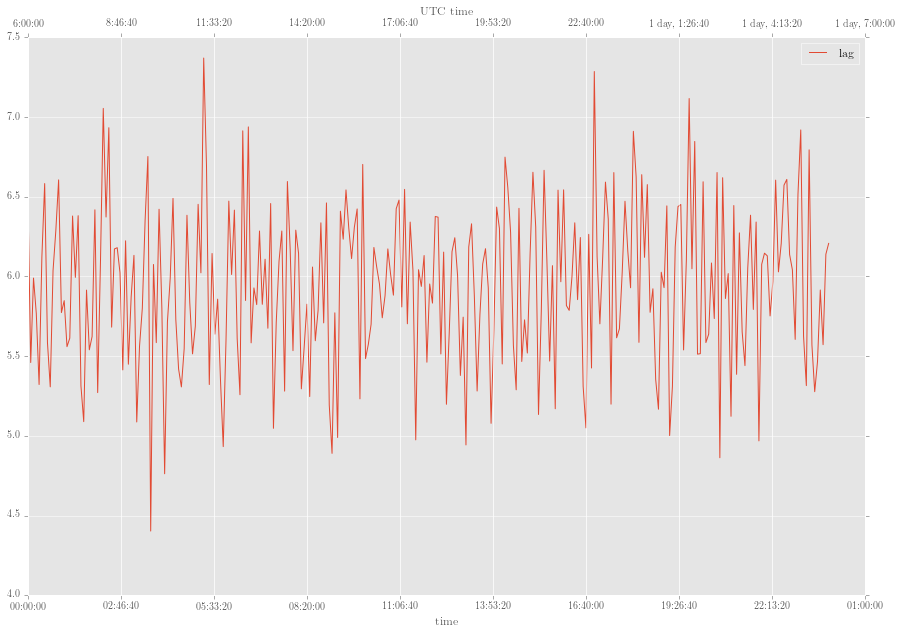

In [18]:
import datetime

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
start_date = datetime.datetime(2016, 9, 5)
end_date = datetime.datetime.now()

dts = []
cur_date = start_date 
while cur_date < end_date:
    dts.append((cur_date, np.random.uniform(low=0.0, high=12.0)))
    cur_date += datetime.timedelta(minutes=np.random.uniform(10, 20))
dts = pd.DataFrame(dts, columns=['timestamp', 'lag'])
dts.index = dts.timestamp
dts.drop('timestamp', axis=1, inplace=True)

cur_time = datetime.datetime(1, 1, 1, 0, 0)
aggs = []
while cur_time < datetime.datetime(1, 1, 1, 23, 59, 0):
    aggs.append((cur_time.time(), 
                dts.between_time(cur_time.time(),
                (cur_time + datetime.timedelta(minutes=5)).time(), 
                include_end=False)['lag'].mean()))
    cur_time += datetime.timedelta(minutes=5)

res = pd.DataFrame(aggs, columns = ['time', 'lag'])
res.index = res.time
res.drop('time', axis=1, inplace=True)

ax = res.plot(figsize=(15, 10))


# Begin solution

ax.set_xticks(ax.get_xticks())

local_ticks = ax.get_xticks().tolist()
labels = [str(datetime.timedelta(seconds=(second+6*60*60))) for second in local_ticks]

ax2 = ax.twiny()
plt.sca(ax2)
ax2.set_xlabel('UTC time')
plt.xticks(local_ticks, labels)

plt.savefig('stackoverflow_41728843.png')

plt.show()